# Health Insurance Cost Analysis

## Data Overview

In [4]:
import numpy as np # for numerical operation
import pandas as pd # for data manipulation and analysis

In [5]:
df = pd.read_csv(r"C:\Users\anups\Downloads\insurance1.csv") # reading Csv file and storing it as data frame  in a tabular structure. r indicates consider path as it is.( for ignoring escape characters) 

In [6]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
df.head(10) # gives top records of data frame

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [8]:
df.tail() # gives bottom records of data frame

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [9]:
df.shape # gives info about no of rows and columns present in that table

(1338, 7)

In [10]:
df.info() # gives detailed information of data frame like datatypes, memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Inference

- **Complete data** : all attributes are having 1338 non null entries which indicate no missing values.
- **Memory usage** : dataset is relatively smaller in size and it makes it efficient to process and analyze.
- **Type of column** : dataset including 4 numerical attributes(int64, float64) and 3 categorical attributes(Object).

In [12]:
df.describe().T # summary statistics for numerical columns and .T is transpose of result

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


- 12,14,16,10,11,13,90,15,17,18
- 10,11,12,13,14,15,16,17,18,90 # sorted data
- median value = 14.5 (Q2), 
- Q1 =12,
- Q3 =17

- IQR= Q3-Q1 (17-12) -> 5

- lower bound = Q1-(1.5 * IQR) 12-(1.5 * 5) -> 4.5
- upper bound = Q3+(1.5 * IQR) 17+(1.5 * 5) -> 24.5
- 90 is outside of limits of LB and UB.


example 2 : 100,200,300,400,500,600,700,800,900,1000,1100,1200,2000,9900,10000.

- Median value Q2 = 800
- Q1=400
- Q3=1200
- IQR = Q3-Q1 (1200-400) -> 800
- LB = 400-(1.5*800) -> -800
- UB = 1200+(1.5*800) -> 2400


boy,boy,boy,boy,boy,boy,boy,boy,girl

## Data Pre-processing


In [16]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
df.rename(columns={
    'age':'Age',
    'sex':'Gender',
    'bmi':'BMI',
    'children':'No of Children',
    'smoker':'Smoker',
    'region':'Region',
    'charges':'Charges'
}, inplace = True)      #replace the old values to new values and inplace=True means changes will be applied directly to the original dataframe.

In [18]:
df.head()

,Age,Gender,BMI,No of Children,Smoker,Region,Charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
df[['BMI','Charges']] = df[['BMI','Charges']].round(2) # rounding off the values to 2 decimal places and appying to same data frame.( 2 columns will be in list)

In [20]:
df.head()

,Age,Gender,BMI,No of Children,Smoker,Region,Charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [21]:
# Import seaborn for advanced statistical visualizations (built on top of matplotlib)
import seaborn as sns  

# Import matplotlib's pyplot module for creating basic visualizations like line charts, bar graphs, and more
import matplotlib.pyplot as plt  

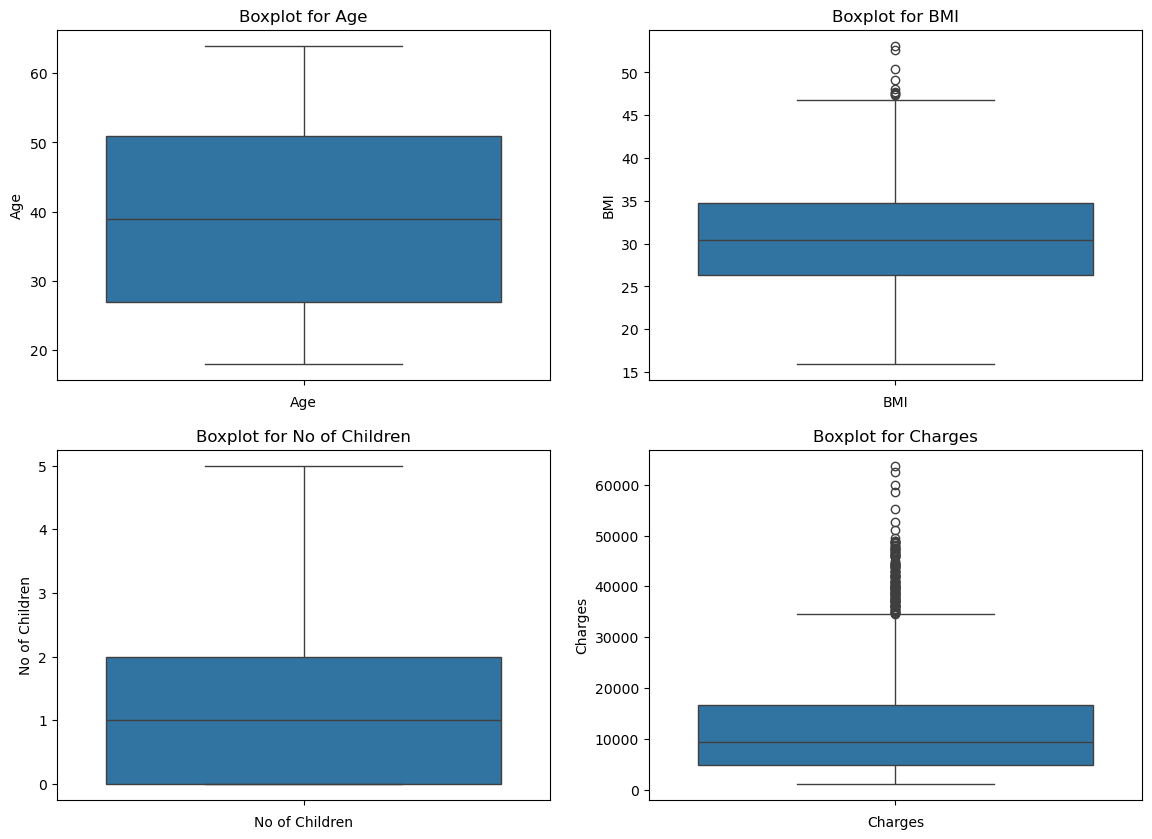

In [22]:
# Create a blank canvas with a custom figure size to organize multiple subplots neatly
plt.figure(figsize=(14,10))  # Width = 14 inches, Height = 10 inches

# First subplot: Boxplot for 'Age'
plt.subplot(2, 2, 1)  # (rows, columns, index): 2x2 grid, first plot
sns.boxplot(y=df['Age'])  # Generate vertical boxplot to visualize distribution and outliers
plt.title('Boxplot for Age')  # Title for the subplot
plt.xlabel('Age')  # Label for the x-axis (even though the boxplot is vertical, this adds clarity)


# Boxplot for BMI 
plt.subplot(2,2,2)
sns.boxplot(y=df['BMI'])
plt.title('Boxplot for BMI')
plt.xlabel('BMI')


# Boxplot for No of Children 
plt.subplot(2,2,3)
sns.boxplot(y=df['No of Children'])
plt.title('Boxplot for No of Children')
plt.xlabel('No of Children')


# Boxplot for Charges 
plt.subplot(2,2,4)
sns.boxplot(y=df['Charges'])
plt.title('Boxplot for Charges')
plt.xlabel('Charges')

plt.show()


In [23]:
# Define a function to remove outliers from a specified column using the IQR method
def remove_outliers(data, column_name):
    # Calculate the 1st quartile (25th percentile)
    Q1 = data[column_name].quantile(0.25)
    
    # Calculate the 3rd quartile (75th percentile)
    Q3 = data[column_name].quantile(0.75)
    
    # Compute the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Define lower bound (anything below this is considered an outlier)
    LB = Q1 - 1.5 * IQR
    
    # Define upper bound (anything above this is considered an outlier)
    UB = Q3 + 1.5 * IQR
    
    # Return a filtered dataframe with only values within the IQR bounds
    return data[(data[column_name] <= UB) & (data[column_name] >= LB)]

# Create a copy of the original dataframe to preserve the original data
df1 = df.copy()

# Remove outliers from the 'Charges' column in df1
df1 = remove_outliers(df1, 'Charges')

# Then remove outliers from the 'BMI' column in the filtered df1
df1 = remove_outliers(df1, 'BMI')


# data[column_name]>UB | data[column_name]<LB
# data[column_name]<=UB & data[column_name]>=LB

In [24]:
df1.shape

(1186, 7)

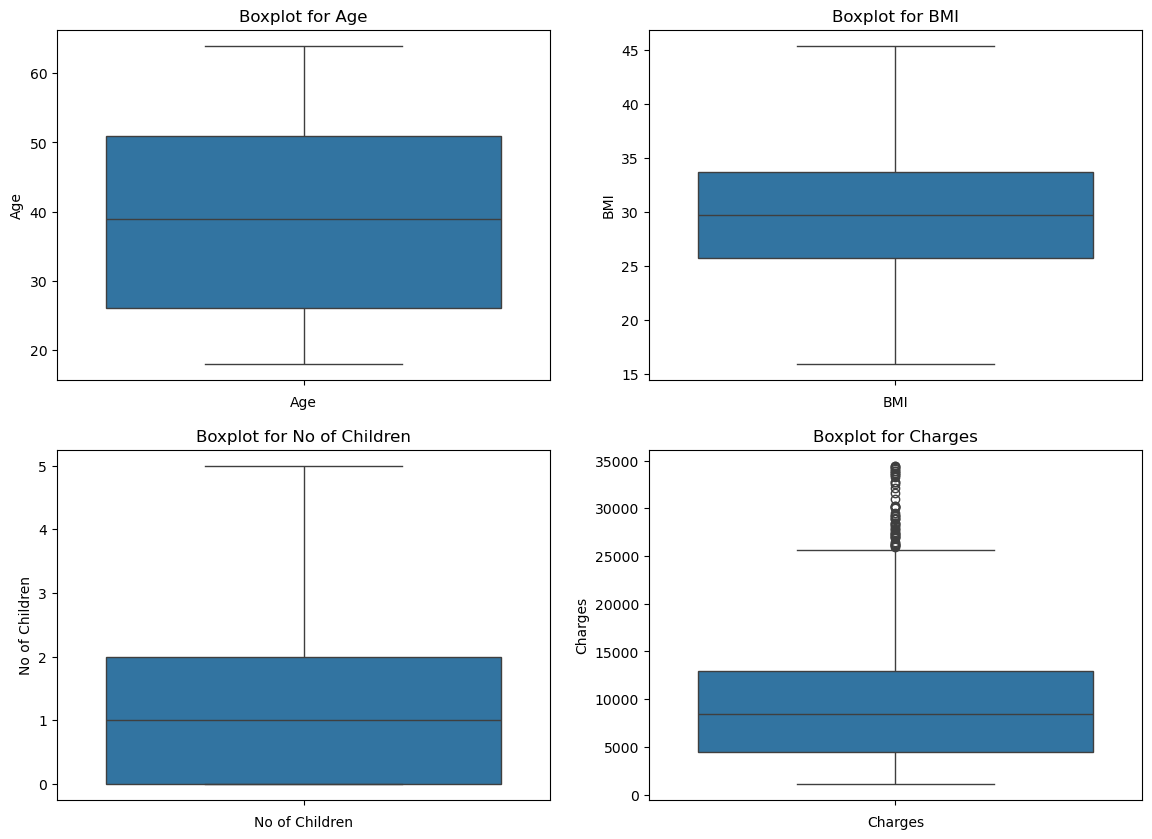

In [25]:
# Create a blank canvas with a custom figure size to organize multiple subplots neatly
plt.figure(figsize=(14,10))  # Width = 14 inches, Height = 10 inches

# First subplot: Boxplot for 'Age'
plt.subplot(2, 2, 1)  # (rows, columns, index): 2x2 grid, first plot
sns.boxplot(y=df1['Age'])  # Generate vertical boxplot to visualize distribution and outliers
plt.title('Boxplot for Age')  # Title for the subplot
plt.xlabel('Age')  # Label for the x-axis (even though the boxplot is vertical, this adds clarity)


# Boxplot for BMI 
plt.subplot(2,2,2)
sns.boxplot(y=df1['BMI'])
plt.title('Boxplot for BMI')
plt.xlabel('BMI')


# Boxplot for No of Children 
plt.subplot(2,2,3)
sns.boxplot(y=df1['No of Children'])
plt.title('Boxplot for No of Children')
plt.xlabel('No of Children')


# Boxplot for Charges 
plt.subplot(2,2,4)
sns.boxplot(y=df1['Charges'])
plt.title('Boxplot for Charges')
plt.xlabel('Charges')

plt.show()


In [26]:
# Define a function to replace outliers in a given column with the column's mean
def replace_outliers(data, column_name):
    # Calculate the 1st and 3rd quartiles
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    
    # Compute the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds for outliers
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR
    
    # Compute the mean of the column
    Mean = data[column_name].mean()
    
    # Create a condition to identify where outliers exist
    condition = (data[column_name] > UB) | (data[column_name] < LB)
    
    # Use np.where to replace outliers with the mean value
    data[column_name] = np.where(condition, Mean, data[column_name])
    
    return data

# Make a copy of the original dataframe to preserve the original data
df2 = df.copy()

# Replace outliers in the 'Charges' column with its mean
df2 = replace_outliers(df2, 'Charges')

# Then replace outliers in the 'BMI' column with its mean
df2 = replace_outliers(df2, 'BMI')

    

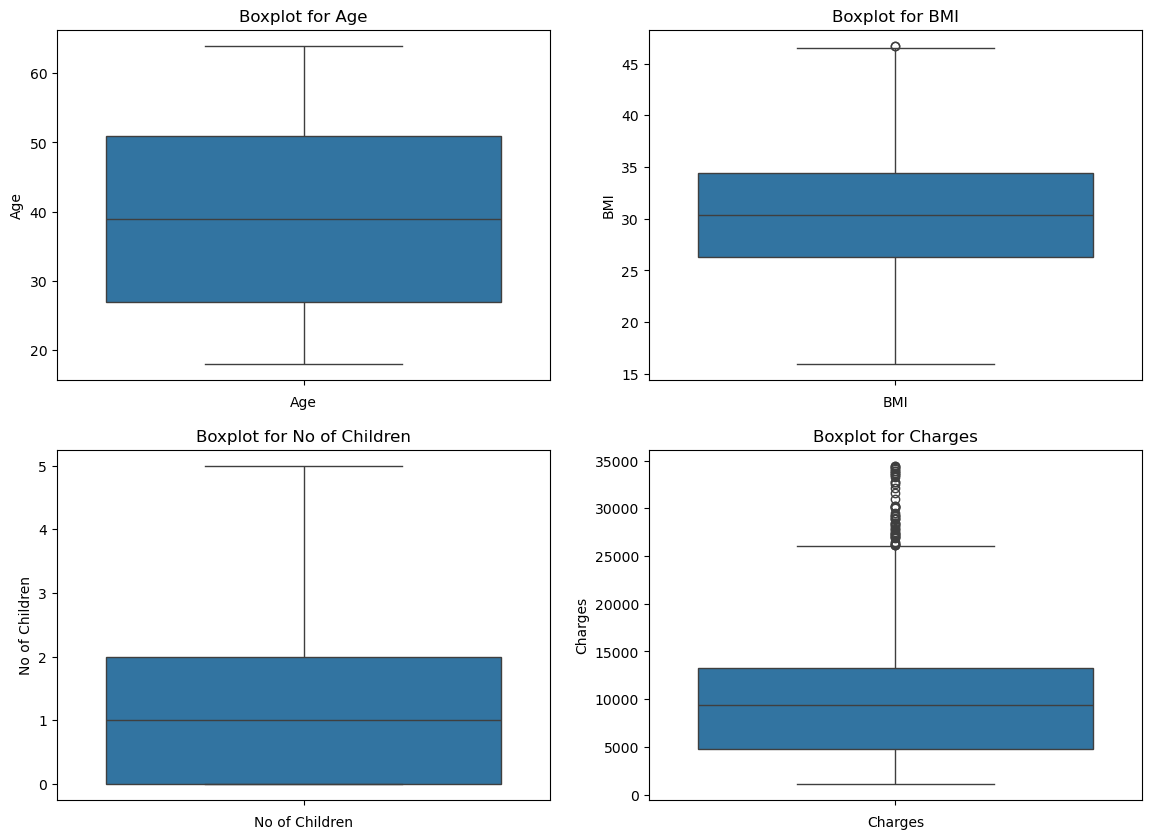

In [27]:
# Create a blank canvas with a custom figure size to organize multiple subplots neatly
plt.figure(figsize=(14,10))  # Width = 14 inches, Height = 10 inches

# First subplot: Boxplot for 'Age'
plt.subplot(2, 2, 1)  # (rows, columns, index): 2x2 grid, first plot
sns.boxplot(y=df2['Age'])  # Generate vertical boxplot to visualize distribution and outliers
plt.title('Boxplot for Age')  # Title for the subplot
plt.xlabel('Age')  # Label for the x-axis (even though the boxplot is vertical, this adds clarity)


# Boxplot for BMI 
plt.subplot(2,2,2)
sns.boxplot(y=df2['BMI'])
plt.title('Boxplot for BMI')
plt.xlabel('BMI')


# Boxplot for No of Children 
plt.subplot(2,2,3)
sns.boxplot(y=df2['No of Children'])
plt.title('Boxplot for No of Children')
plt.xlabel('No of Children')


# Boxplot for Charges 
plt.subplot(2,2,4)
sns.boxplot(y=df2['Charges'])
plt.title('Boxplot for Charges')
plt.xlabel('Charges')

plt.show()


In [28]:
df=replace_outliers(df,'BMI')

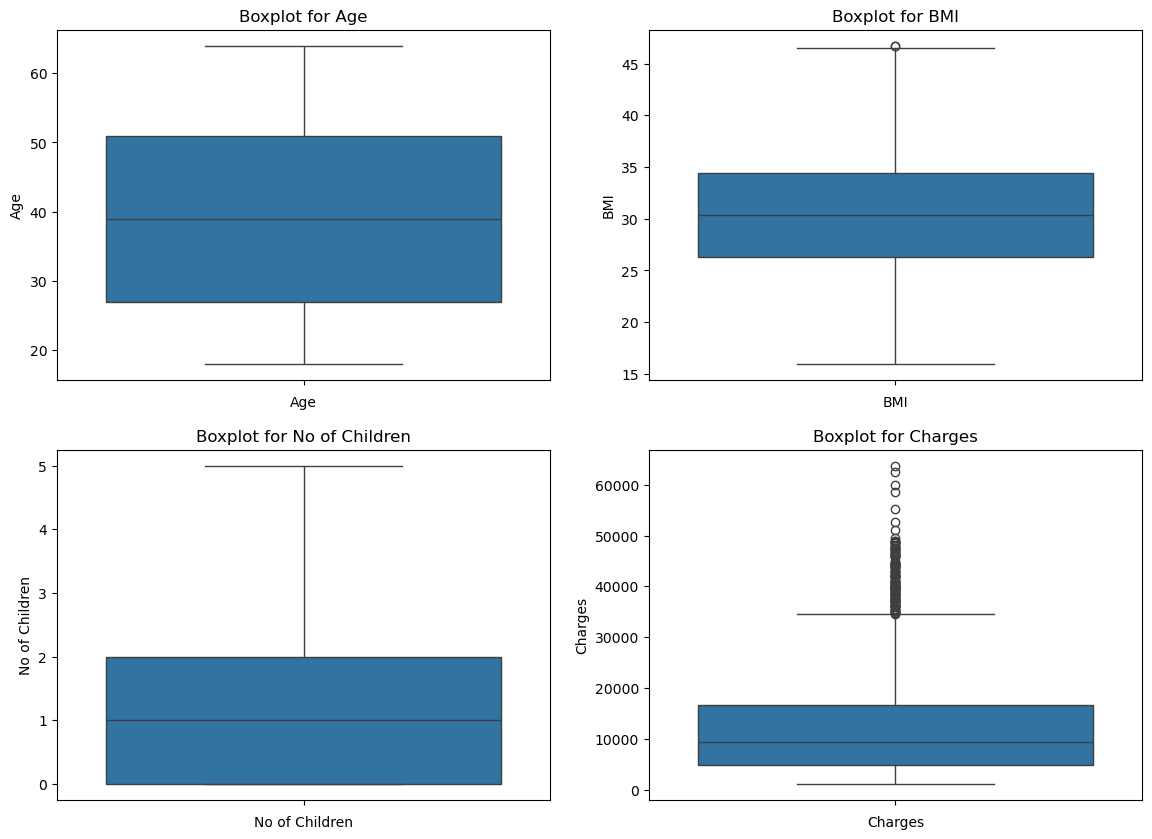

In [29]:
# Create a blank canvas with a custom figure size to organize multiple subplots neatly
plt.figure(figsize=(14,10))  # Width = 14 inches, Height = 10 inches

# First subplot: Boxplot for 'Age'
plt.subplot(2, 2, 1)  # (rows, columns, index): 2x2 grid, first plot
sns.boxplot(y=df['Age'])  # Generate vertical boxplot to visualize distribution and outliers
plt.title('Boxplot for Age')  # Title for the subplot
plt.xlabel('Age')  # Label for the x-axis (even though the boxplot is vertical, this adds clarity)


# Boxplot for BMI 
plt.subplot(2,2,2)
sns.boxplot(y=df['BMI'])
plt.title('Boxplot for BMI')
plt.xlabel('BMI')


# Boxplot for No of Children 
plt.subplot(2,2,3)
sns.boxplot(y=df['No of Children'])
plt.title('Boxplot for No of Children')
plt.xlabel('No of Children')


# Boxplot for Charges 
plt.subplot(2,2,4)
sns.boxplot(y=df['Charges'])
plt.title('Boxplot for Charges')
plt.xlabel('Charges')

plt.show()


## EDA

### Univariate Analysis


In [32]:
df.head()

,Age,Gender,BMI,No of Children,Smoker,Region,Charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


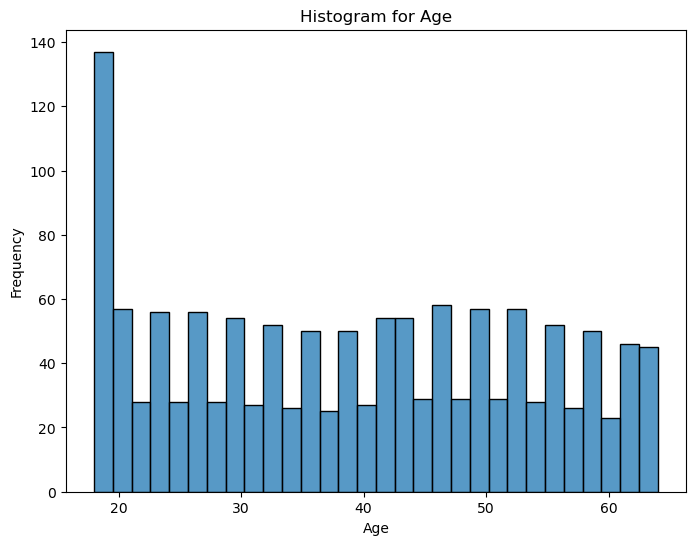

In [33]:
# Histogram for Age column

plt.figure(figsize=(8,6))
sns.histplot(data=df,x='Age',bins=30)
plt.title('Histogram for Age')  # Title for the subplot
plt.xlabel('Age')  
plt.ylabel('Frequency')
plt.show()

Age Observations:
The highest frequency occurs around age 20, where approximately 140 individuals fall within that range.
Other age intervals have relatively lower and more evenly distributed frequencies, mostly between 40 and 60.
The shape suggests that the dataset contains a concentrated group of younger individuals.


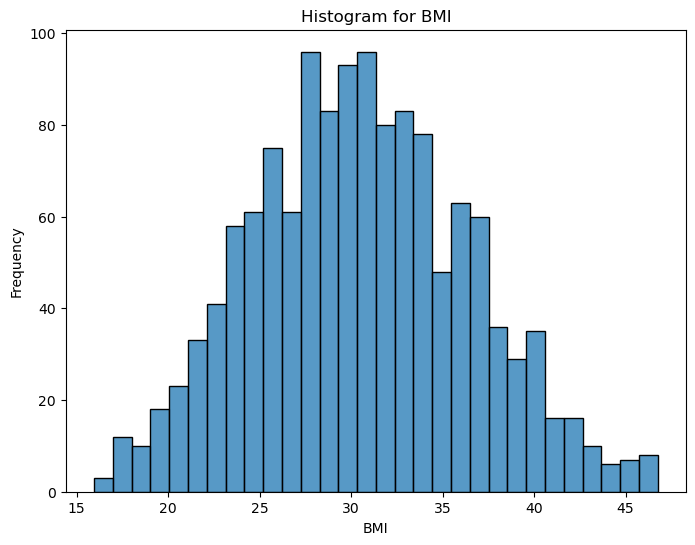

In [35]:
# Histogram for BMI column

plt.figure(figsize=(8,6))
sns.histplot(data=df,x='BMI',bins=30)
plt.title('Histogram for BMI')  # Title for the subplot
plt.xlabel('BMI')  
plt.ylabel('Frequency')
plt.show()

BMI Distribution:
Peak frequency: Likely concentrated around a common BMI range (e.g., 18.5–24.9, normal weight).
Other BMI ranges: Spread across overweight and Weight categories, with fewer in underweight.
Shape: Could be right-skewed if higher BMI values dominate.


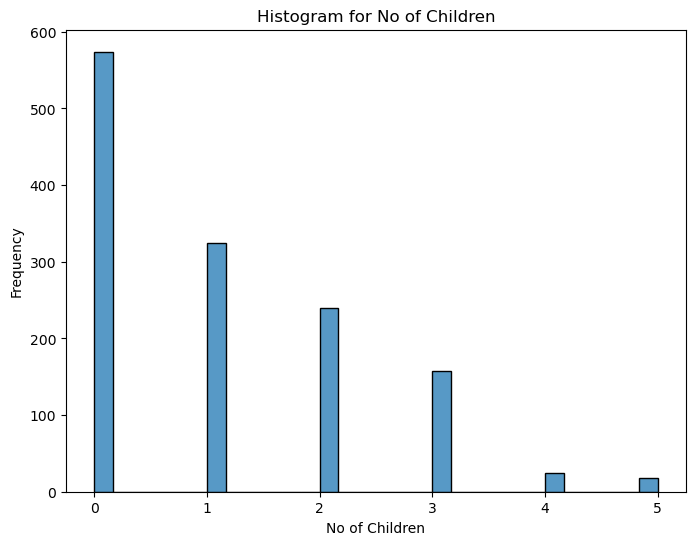

In [37]:
# Histogram for No of Children column

plt.figure(figsize=(8,6))
sns.histplot(data=df,x='No of Children',bins=30)
plt.title('Histogram for No of Children')  # Title for the subplot
plt.xlabel('No of Children')  
plt.ylabel('Frequency')
plt.show()

X-axis (No. of Children): Represents different values indicating how many children each individual has.
Y-axis (Frequency): Shows how many individuals fall into each category.
Peaks & Trends: If there’s a noticeable peak at certain values (e.g., 0 or 2), it suggests that those are the most common numbers of children in the dataset.
Skewness: If the histogram is right-skewed, more individuals may have fewer children. If it's left-skewed, larger families might dominate.


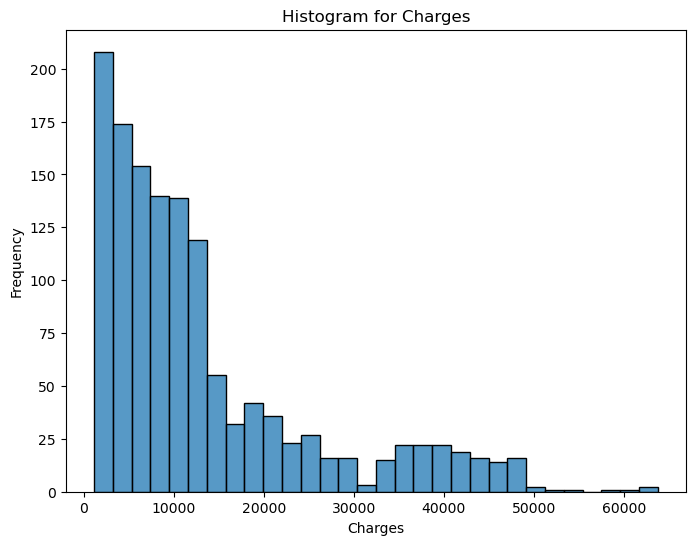

In [39]:
# Histogram for Charges column

plt.figure(figsize=(8,6))
sns.histplot(data=df,x='Charges',bins=30)
plt.title('Histogram for Charges')  # Title for the subplot
plt.xlabel('Charges')  
plt.ylabel('Frequency')
plt.show()

X-axis (Charges): Represents different charge amounts.
Y-axis (Frequency): Shows how many individuals fall within each charge range.
Distribution Pattern: The histogram is right-skewed, meaning most charges are concentrated at the lower end, while fewer individuals have higher charges.
Peak Frequency: The highest number of occurrences is between 0 and 10,000, indicating that lower charges are more common.
Long Tail: The distribution extends toward higher charges (up to ~60,000), but these values are much less frequent.


In [41]:
# Value counts for each categorical columns

Gender_counts=df['Gender'].value_counts()
Smoker_counts=df['Smoker'].value_counts()
Region_counts=df['Region'].value_counts()
Gender_counts,Smoker_counts,Region_counts

(Gender
 male      676
 female    662
 Name: count, dtype: int64,
 Smoker
 no     1064
 yes     274
 Name: count, dtype: int64,
 Region
 southeast    364
 southwest    325
 northwest    325
 northeast    324
 Name: count, dtype: int64)

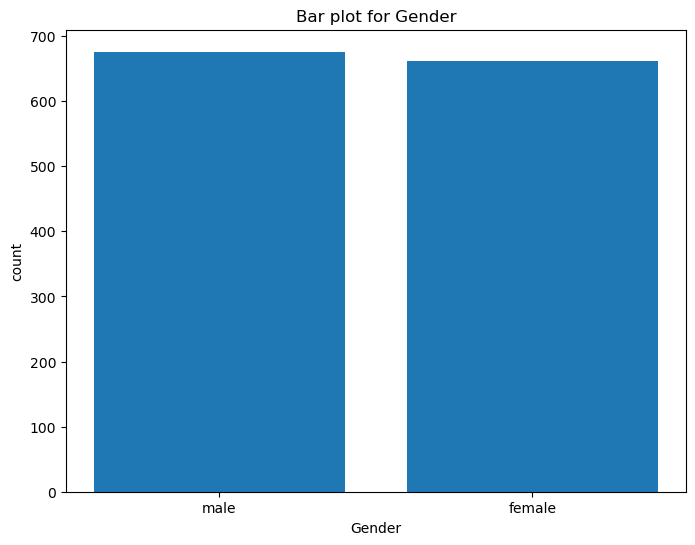

In [42]:
# Bar plot for Gender Column
plt.figure(figsize=(8,6))
plt.bar(Gender_counts.index,Gender_counts.values)
plt.title('Bar plot for Gender')  # Title for the subplot
plt.xlabel('Gender')  
plt.ylabel('count')
plt.show()

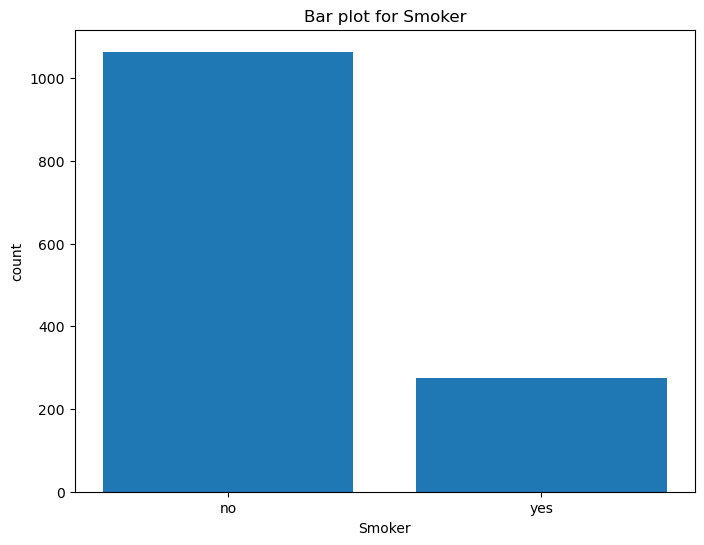

In [43]:
# Bar plot for Smoker Column
plt.figure(figsize=(8,6))
plt.bar(Smoker_counts.index,Smoker_counts.values)
plt.title('Bar plot for Smoker')  # Title for the subplot
plt.xlabel('Smoker')  
plt.ylabel('count')
plt.show()

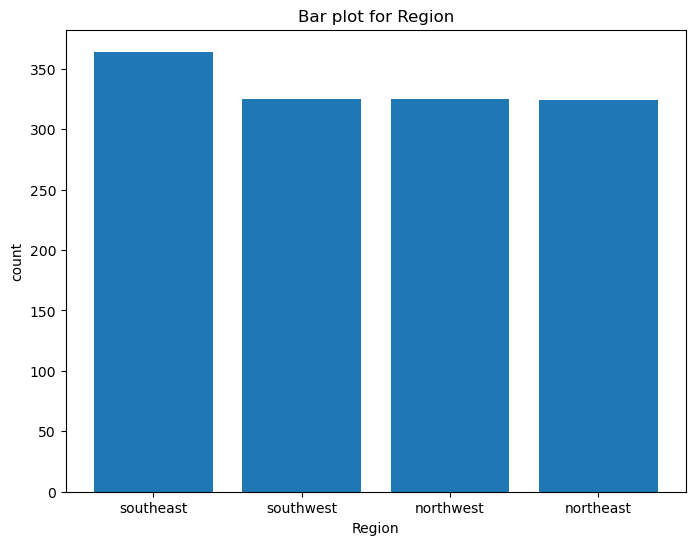

In [44]:
# Bar plot for Region Column
plt.figure(figsize=(8,6))
plt.bar(Region_counts.index,Region_counts.values)
plt.title('Bar plot for Region')  # Title for the subplot
plt.xlabel('Region')  
plt.ylabel('count')
plt.show()

## Bi-Variate Analysis

In [46]:
numerical_df = df.select_dtypes(include=['int64','float64'])
numerical_df.head()

,Age,BMI,No of Children,Charges
0,19,27.90,0,16884.92
1,18,33.77,1,1725.55
2,28,33.00,3,4449.46
3,33,22.70,0,21984.47
4,32,28.88,0,3866.86


- -1 to 1: whole range of Correlation values
- 0: Neutral Correlation value
- -1 and 1: Extreme points of Correlation values
- -1 to -0.3: Stronger Negative Correlation value 
- -0.3 to 0: Weaker Negative Correlation value
- 0 to 0.3: Weaker Positive Correlation value
- 0.3 to 1: Stronger Positive Correlation value


In [48]:
# Compute the Correlation Matrix
correlation_matrix=numerical_df.corr()
correlation_matrix

,Age,BMI,No of Children,Charges
Age,1.000000,0.114291,0.042469,0.299008
BMI,0.114291,1.000000,0.017314,0.190843
No of Children,0.042469,0.017314,1.000000,0.067998
Charges,0.299008,0.190843,0.067998,1.000000


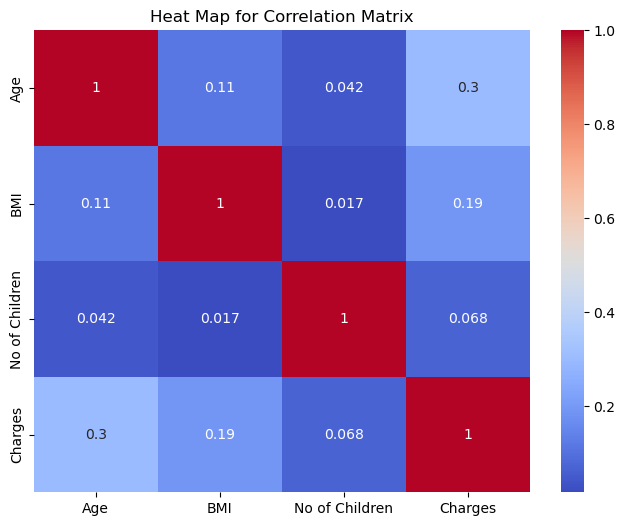

In [49]:
# Create Heat Map for Correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,cmap='coolwarm',annot=True)
plt.title('Heat Map for Correlation Matrix')
plt.show()

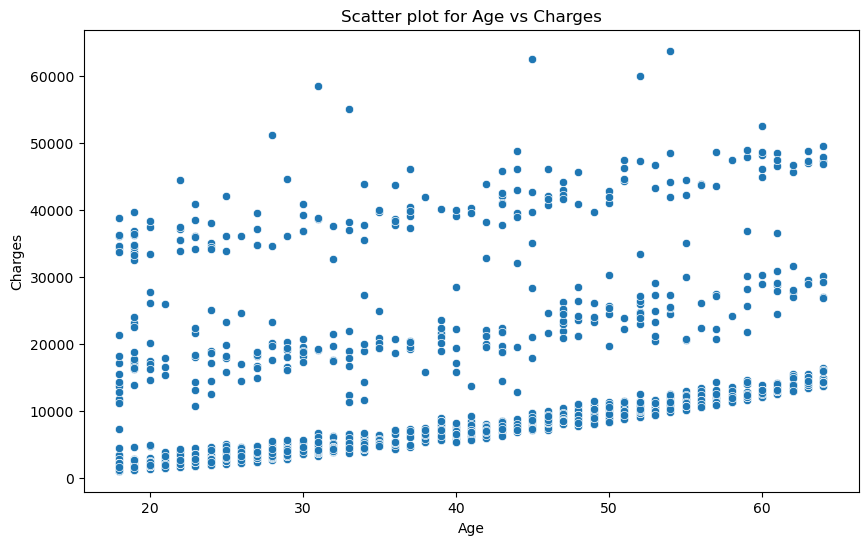

In [50]:
# Scatter plot for Age vs Charges
plt.figure(figsize=(10,6))
sns.scatterplot(data=numerical_df,x='Age',y='Charges')
plt.title('Scatter plot for Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

### Multivariate analysis

In [52]:
# Cross Tabulation for Gender and Smoker
gender_smoker_crosstab=pd.crosstab(df['Gender'],df['Smoker'])
gender_smoker_crosstab

Smoker,no,yes
Gender,,
female,547,115
male,517,159


In [53]:
# cross tabulation for gender and No of children
gender_children_crosstab=pd.crosstab(df['Gender'],df['No of Children'])
gender_children_crosstab

No of Children,0,1,2,3,4,5
Gender,,,,,,
female,289,158,119,77,11,8
male,285,166,121,80,14,10


In [54]:
# how many females whose age is 32
gender_age_crosstab=pd.crosstab(df['Gender'],df['Age'])
gender_age_crosstab

Age,18,19,20,21,22,23,24,25,26,27,...,55,56,57,58,59,60,61,62,63,64
Gender,,,,,,,,,,,,,,,,,,,,,
female,33,33,14,13,13,14,14,13,13,14,...,13,13,13,13,13,11,12,12,12,11
male,36,35,15,15,15,14,14,15,15,14,...,13,13,13,12,12,12,11,11,11,11


In [55]:
# how many smokers are there in south region
region_smoker_crosstab=pd.crosstab(df['Region'],df['Smoker'])
region_smoker_crosstab
# 149 

Smoker,no,yes
Region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


In [56]:
# which region is having the higher smokers over there comparitively (91)
# which is region which is having male dominance
region_gender_crosstab=pd.crosstab(df['Region'],df['Gender'])
region_gender_crosstab
# NE,SE,SW

Gender,female,male
Region,,
northeast,161,163
northwest,164,161
southeast,175,189
southwest,162,163


In [57]:
# pivot table for gender and BMI , find avg BMI value for male or female
pivot_gender_bmi=pd.pivot_table(df,index='Gender',values='BMI',aggfunc='max') # by default mean or avg will be calculated.
pivot_gender_bmi

,BMI
Gender,
female,46.75
male,46.53


In [58]:
# what is avg age for a smoker who lives in Southeast region
pivot_avg=pd.pivot_table(df,index=['Smoker','Region'],values='Age',aggfunc='mean') # by default mean or avg will be calculated.
pivot_avg

Age
Smoker Region              
no     northeast  39.536965
       northwest  39.168539
       southeast  38.673993
       southwest  40.183521
yes    northeast  38.238806
       northwest  39.327586
       southeast  39.736264
       southwest  36.103448

In [59]:
# what is highest charges being charged to female smoker in south region
pivot_high_charges=pd.pivot_table(df,index=['Smoker','Region','Gender'],values='Charges',aggfunc='max') # by default mean or avg will be calculated.
pivot_high_charges
# 63770 is highest charge

Charges
Smoker Region    Gender          
no     northeast female  31620.00
                 male    32108.66
       northwest female  33471.97
                 male    30284.64
       southeast female  36580.28
                 male    27724.29
       southwest female  36910.61
                 male    27941.29
yes    northeast female  58571.07
                 male    48549.18
       northwest female  55135.40
                 male    60021.40
       southeast female  63770.43
                 male    62592.87
       southwest female  48824.45
                 male    52590.83

In [60]:
# Avg age for male smoker from north region
Avg_age=pd.pivot_table(df,index=['Smoker','Region','Gender'],values='Age',aggfunc='mean') # by default mean or avg will be calculated.
Avg_age
# avg of 37.86 and 39.82 is 38.84

Age
Smoker Region    Gender           
no     northeast female  39.840909
                 male    39.216000
       northwest female  39.755556
                 male    38.568182
       southeast female  39.071942
                 male    38.261194
       southwest female  40.099291
                 male    40.277778
yes    northeast female  38.724138
                 male    37.868421
       northwest female  38.827586
                 male    39.827586
       southeast female  39.250000
                 male    40.054545
       southwest female  37.047619
                 male    35.567568

In [61]:
# Difference between max and min charges for a person who is a female smoker
max_diff=pd.pivot_table(df,index=['Smoker','Gender'],values='Charges',aggfunc=['max','min']) # by default mean or avg will be calculated.
# min_diff=pd.pivot_table(df,index=['Smoker','Gender'],values='Charges',aggfunc='min')
max_diff

max       min
                Charges   Charges
Smoker Gender                    
no     female  36910.61   1607.51
       male    32108.66   1121.87
yes    female  63770.43  13844.51
       male    62592.87  12829.46

In [62]:
# Difference between max and min charges for a person who is a female smoker
max_diff=pd.pivot_table(df,index=['Smoker','Gender'],values='Charges',aggfunc=lambda x: x.max()-x.min()) # by default mean or avg will be calculated.
# min_diff=pd.pivot_table(df,index=['Smoker','Gender'],values='Charges',aggfunc='min')
max_diff

Charges
Smoker Gender          
no     female  35303.10
       male    30986.79
yes    female  49925.92
       male    49763.41

In [74]:
# Mean of charges > 10,000
mean_high_charges = pd.pivot_table(df,index=['Smoker', 'Gender'],values='Charges',aggfunc=lambda x: x[x > 10000].mean())
mean_high_charges

Charges
Smoker Gender              
no     female  15044.980052
       male    14861.726875
yes    female  30678.996087
       male    33042.006226

In [63]:
# explore pivot and cross tabulations , as well as about different aggregate functions(specifically lambda function)


In [67]:
# avg age for male from southwest region, (use cross tabulation) hint: columns can be used.
Avg_age_crosstab=pd.crosstab(index=df['Region'],columns=df['Gender'],values=df['Age'],aggfunc='mean') # by default count/frequency will be calculated.
Avg_age_crosstab
# 39.20

Gender,female,male
Region,,
northeast,39.639752,38.901840
northwest,39.591463,38.795031
southeast,39.108571,38.783069
southwest,39.703704,39.208589


In [69]:
# how many kids are there who are having smoker mother from south region using pivot
pivot_kids=pd.pivot_table(df,index=['Smoker','Gender','Region'],values='No of Children',aggfunc='sum') # by default mean or avg will be calculated.
pivot_kids
# 56 kids
# count is no of records and sum is values of records

result=pivot_kids.loc[('yes','female','southeast')] # locating function to get the exact value
result

No of Children    34
Name: (yes, female, southeast), dtype: int64